In [1]:
# import packages
import os 
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.backend.backend())

tensorflow


In [26]:
from keras import layers,losses,metrics,activations,callbacks,initializers,regularizers,optimizers
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sklearn, datetime, pickle
import tensorflow as tf

In [27]:
CSV_PATH = os.path.join(os.getcwd(),'dataset','ecommerceDataset.csv')
df = pd.read_csv(CSV_PATH,names = ['category','description'],header=None)
print(df.head())
print(df.shape)
print(df.info())

    category                                        description
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
(50425, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50425 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None


In [28]:
df.category.value_counts()

category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [29]:
print("Total missing values in columns: ","\n",df.isna().sum())
print("Duplicates: ",df.duplicated().sum())

Total missing values in columns:  
 category       0
description    1
dtype: int64
Duplicates:  22622


In [30]:
#print out missing values in description column
missing_values = df[df['description'].isna()]
print(missing_values)

                     category description
39330  Clothing & Accessories         NaN


In [31]:
#dropping the one single missing value row
df.dropna(inplace=True)
df.shape

(50424, 2)

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50424 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     50424 non-null  object
 1   description  50424 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [33]:
#replacing name for clothing n accessories for standardization naming 
df.category.replace("Clothing & Accessories", "Clothing_Accessories", inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_20140\818487663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.category.replace("Clothing & Accessories", "Clothing_Accessories", inplace=True)


In [34]:
df.category.value_counts()

category
Household               19313
Books                   11820
Electronics             10621
Clothing_Accessories     8670
Name: count, dtype: int64

In [35]:
df.dtypes

category       object
description    object
dtype: object

In [36]:
df = df.drop_duplicates()
print(df)

          category                                        description
0        Household  Paper Plane Design Framed Wall Hanging Motivat...
1        Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2        Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3        Household  SAF Flower Print Framed Painting (Synthetic, 1...
4        Household  Incredible Gifts India Wooden Happy Birthday U...
...            ...                                                ...
50402  Electronics  Micromax Bharat 5 Plus Zero impact on visual d...
50403  Electronics  Microsoft Lumia 550 8GB 4G Black Microsoft lum...
50407  Electronics  Microsoft Lumia 535 (Black, 8GB) Colour:Black ...
50408  Electronics  Karbonn Titanium Wind W4 (White) Karbonn Titan...
50410  Electronics  Nokia Lumia 530 (Dual SIM, Grey) Colour:Grey  ...

[27802 rows x 2 columns]


In [37]:
import string
df['description'] = df['description'].str.replace(f"[{string.punctuation}]","",regex=True)
df['description'] = df['description'].str.lower()
df['description'] = df['description'].str.replace(r"\d+",'',regex=True)
print(df['description'])

0        paper plane design framed wall hanging motivat...
1        saf floral framed painting wood  inch x  inch ...
2        saf uv textured modern art print framed painti...
3        saf flower print framed painting synthetic  in...
4        incredible gifts india wooden happy birthday u...
                               ...                        
50402    micromax bharat  plus zero impact on visual di...
50403    microsoft lumia  gb g black microsoft lumia  e...
50407    microsoft lumia  black gb colourblack   produc...
50408    karbonn titanium wind w white karbonn titanium...
50410    nokia lumia  dual sim grey colourgrey   produc...
Name: description, Length: 27802, dtype: object


In [38]:
#Viewing frequency of category columns
def plotting(dataframe, col_name):
    counts = dataframe[col_name].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index.astype(str), counts.values, color='skyblue')
    plt.title(f"Countplot of {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.show()

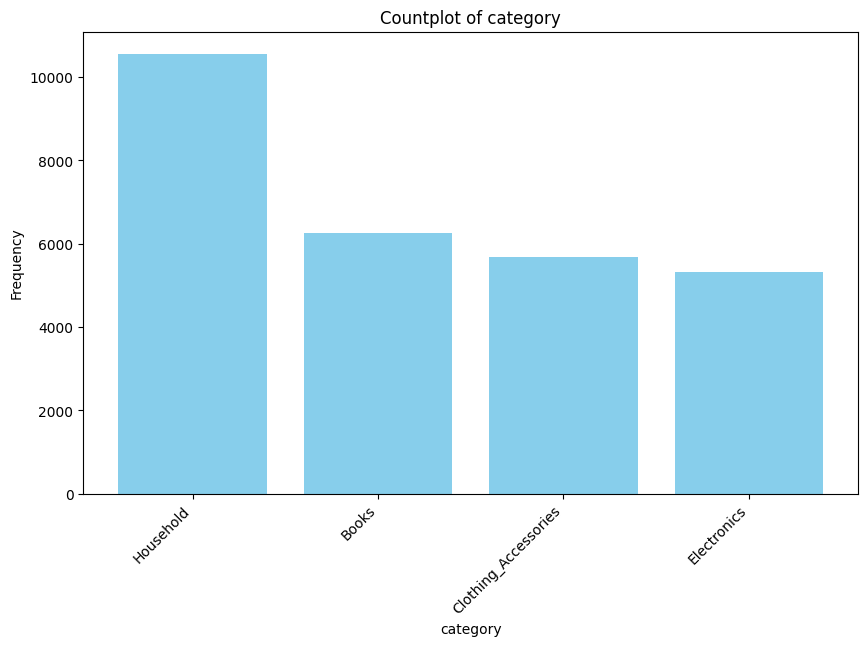

In [39]:
plotting(df,'category')

In [40]:
#Viewing frequency used words of description columns
def wordcloud_vis(df, col_name):
    
    plt.figure(figsize=(20, 20)) 
    wc = WordCloud(max_words=1500, width=1300, height=2000, stopwords=STOPWORDS).generate(' '.join(df[col_name]))
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

In [41]:
#visualize frequent used word in wordcloud for description column
# wordcloud_vis(df,'description')

In [42]:
#preprocessing
import sklearn.preprocessing
from sklearn import model_selection

features = df['description'].values
label = df['category'].values
# uncomment to confirm values
# print(features)
# print(label)

# Performing label encoding
label_encoder =  sklearn.preprocessing.LabelEncoder()
label_encoded = label_encoder.fit_transform(label)
print(label_encoded[:5])
#checking first 5 categories that is changed from string to numbers


[3 3 3 3 3]


In [43]:
#perform inverse transform with the encoder to convert back to original values
sample_categories = [0,1,2,3]
print(label_encoder.inverse_transform(sample_categories))

['Books' 'Clothing_Accessories' 'Electronics' 'Household']


In [44]:
# Data Splitting
SEED = 42
x_train,x_split,y_train,y_split = model_selection.train_test_split(features,label_encoded,train_size=0.7
                                                                 ,random_state = SEED)
x_val,x_test,y_val,y_test = model_selection.train_test_split(x_split,y_split,train_size = 0.5, 
                                                             random_state = SEED)

In [45]:
#NLP
# (A) Tokenization
tokenizer = layers.TextVectorization(max_tokens=10000,output_sequence_length=200)
tokenizer.adapt(x_train)

In [46]:
# [Optional] test the tokenizer
sample_text = x_train[:2]
sample_tokens = tokenizer(sample_text)
print(sample_text)
print(sample_tokens)

['turning point review praise for danielle steel  steel is one of the best los angeles times  few modern writers convey the pathos of family and material life with such heartfelt empathy the philadelphia inquirer  steel pulls out all the emotional stops she delivers publishers weekly  what counts for the reader is the ring of authenticity san francisco chronicle about the author danielle steel has been hailed as one of the worlds most popular authors with over  million copies of her novels sold her many international bestsellers include beauchamp hall in his fathers footsteps the good fight the cast accidental heroes fall from grace  and other highly acclaimed novels she is also the author of his bright light  the story of her son nick trainas life and death a gift of hope  a memoir of her work with the homeless pure joy  about the dogs she and her family have loved and the childrens books pretty minnie in paris and pretty minnie in hollywood'
 'imported pcs red soft earthworm fishing 

In [47]:
# (B) Embedding 
embedding = layers.Embedding(10000,64)

In [48]:
# using bi directional lstm for ambiguity of data
model = keras.Sequential()
# (A) NLP layers
model.add(tokenizer)
model.add(embedding)
# (B) RNN (Wrap up with bi directional lstm layer)
model.add(layers.Bidirectional(layers.LSTM(32,return_sequences=False)))
# (C) Output layer
model.add(layers.Dense(len(df['category'].unique()),activation="softmax"))

In [57]:
log_dir = "logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [58]:
# Model compile 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
# Model Training
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=5,callbacks=[tensorboard_callback])

Epoch 1/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 56s 84ms/step - accuracy: 0.9936 - loss: 0.0233 - val_accuracy: 0.9499 - val_loss: 0.2281
Epoch 2/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 53s 87ms/step - accuracy: 0.9966 - loss: 0.0140 - val_accuracy: 0.9506 - val_loss: 0.2253
Epoch 3/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 52s 85ms/step - accuracy: 0.9979 - loss: 0.0082 - val_accuracy: 0.9506 - val_loss: 0.2400
Epoch 4/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9470 - val_loss: 0.2648
Epoch 5/5
609/609 ━━━━━━━━━━━━━━━━━━━━ 54s 88ms/step - accuracy: 0.9980 - loss: 0.0057 - val_accuracy: 0.9434 - val_loss: 0.3329


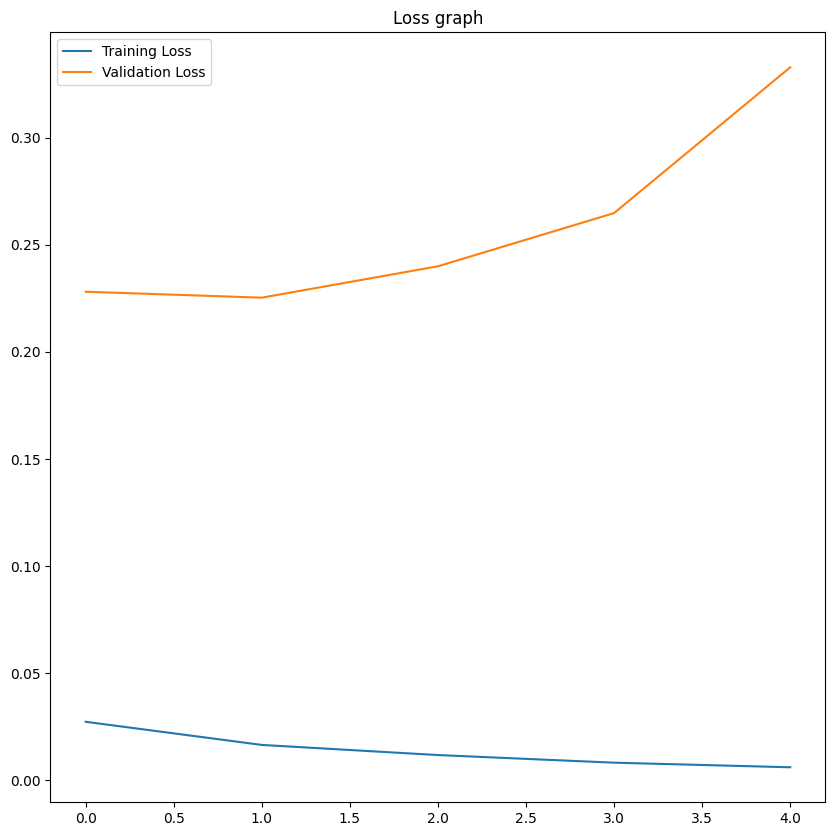

In [60]:
# Check training result
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss graph')
plt.show()

In [61]:
# Evaluate the model with test data
print(model.evaluate(x_test,y_test))

131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9441 - loss: 0.3621
[0.3700719177722931, 0.9424598217010498]


In [62]:
y_pred = np.argmax(model.predict(x_test),axis=1)
print(y_pred)

131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step
[2 2 3 ... 3 1 0]


In [63]:
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='weighted')
accuracy_percentage = accuracy * 100
print(f"Accuracy:{accuracy_percentage:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy:94.25
F1-Score: 0.94


In [64]:
# Save the label encoder via pickle
with open('shop_encoder.pkl','wb') as f:
    pickle.dump(label_encoder,f)

In [66]:
import json 
os.makedirs("saved_models",exist_ok=True)
model.save("saved_models/models.h5")

vocab = tokenizer.get_vocabulary()
vocab_dict = {i: word for i, word in enumerate(vocab)}
with open ("saved_models/tokenizer.json","w") as f:
    json.dump(vocab_dict,f)